In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.utils import np_utils

datasets

In [6]:
from keras.datasets import boston_housing
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


Start building Neural Network Model

In [12]:
model = Sequential()
model.add(Dense(100, input_shape=(13,)))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

compile model

In [17]:
model.compile(optimizer='adam',
             loss = 'mean_squared_error',
             metrics = ['mse'])

model.fit(X_train, y_train,
         batch_size=32,
         nb_epoch=50,
         verbose=2,
         validation_data=(X_test, y_test))

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 404 samples, validate on 102 samples
Epoch 1/50
 - 0s - loss: 206.0417 - mse: 206.0417 - val_loss: 123.2029 - val_mse: 123.2029
Epoch 2/50
 - 0s - loss: 94.2929 - mse: 94.2929 - val_loss: 93.1511 - val_mse: 93.1511
Epoch 3/50
 - 0s - loss: 70.2748 - mse: 70.2748 - val_loss: 60.5646 - val_mse: 60.5646
Epoch 4/50
 - 0s - loss: 61.5407 - mse: 61.5407 - val_loss: 63.2596 - val_mse: 63.2596
Epoch 5/50
 - 0s - loss: 58.9804 - mse: 58.9804 - val_loss: 59.2431 - val_mse: 59.2431
Epoch 6/50
 - 0s - loss: 57.9744 - mse: 57.9744 - val_loss: 58.7593 - val_mse: 58.7593
Epoch 7/50
 - 0s - loss: 54.3683 - mse: 54.3683 - val_loss: 60.0823 - val_mse: 60.0823
Epoch 8/50
 - 0s - loss: 56.1920 - mse: 56.1920 - val_loss: 56.7390 - val_mse: 56.7390
Epoch 9/50
 - 0s - loss: 57.3227 - mse: 57.3227 - val_loss: 63.5610 - val_mse: 63.5610
Epoch 10/50
 - 0s - loss: 52.9130 - mse: 52.9130 - val_loss: 54.9353 - val_mse: 54.9353
Epoch 11/50
 - 0s - loss: 52.6318 - mse: 52.6318 - val_loss: 56.5754 - val_mse:

In [19]:
model.predict(X_test[:5])

array([[10.147964],
       [16.869013],
       [21.822392],
       [28.678123],
       [22.748266]], dtype=float32)

In [21]:
# model.predict(X_test).reshape(-1)
print(model.predict(X_test).flatten())

[10.147964  16.869013  21.822392  28.678123  22.748266  19.911137
 26.507486  21.787485  17.888195  17.240896  13.384179  19.682041
 16.306414  34.522858  14.913942  21.024267  23.765427  18.973543
 16.283524  21.697544  10.70167   10.749326  19.670166  15.495399
 22.463673  18.870035  24.428473  45.05474   11.969198  23.485514
 18.846447  13.310129  27.340626  23.041681  15.464359   8.421866
 12.968734  11.2843    19.45589   25.671085  27.412306  21.075092
 14.588486  26.37382   41.101997  24.008444  29.82763   18.85849
 22.656073  22.23287   37.927185  19.09816   11.548006  16.63425
 27.669703  23.797615  13.313883  28.71409   29.413054  24.78368
 18.427382  15.489025  14.6591835 19.030212  23.16924   22.528849
 14.321361  22.73192   11.432545   9.994839  21.250217  26.403992
 19.879309  13.314436  23.52155   19.792973  22.169022  21.915085
 31.07812    9.420272  19.864988  34.894833  16.99439   14.09194
 20.794899  17.268948  16.377073  19.203957  21.185774  24.901712
 18.088974  25

In [22]:
print(y_test)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [23]:
np.mean(y_test == model.predict(X_test).flatten())

0.0

In [24]:
np.sum(y_test - model.predict(X_test).flatten()**2)/ (y_test.shape[0])

-481.3185833201689

# plotting 

In [26]:
y_pred = model.predict(X_test)

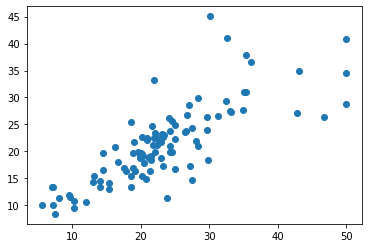

In [27]:
plt .scatter(y_test, y_pred)
plt.show()

now plot the differences means HITSOGRAM plotting

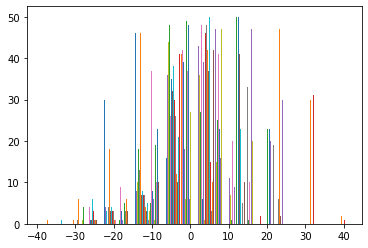

In [29]:
plt.hist(y_test - y_pred)
plt.show()

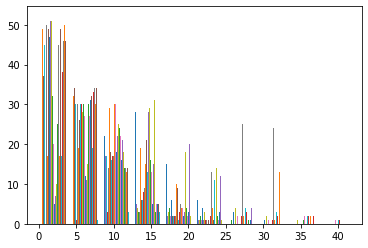

In [30]:
plt.hist(abs(y_test - y_pred))
plt.show()